In [1]:
# Install necessary packages
!pip install pandas matplotlib scikit-learn joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

# Load the cleaned training data from the CSV file
data = pd.read_csv('dataset/data.csv', delimiter=';')

# Filter the data to remove rows where Target is 'Enrolled' and keep rows where Target is 'Dropout' or 'Graduate'
data = data[data['Target'].isin(['Dropout', 'Graduate'])]
data

# List of columns to drop (same as before)
columns_to_drop = [
    'Marital status',
    'Daytime/evening attendance',
    'Nacionality',
    'Displaced',
    'Educational special needs',
    'International',
    'Previous qualification',
    'Gender',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (without evaluations)',
    'Target'
]

# Drop irrelevant columns from the data
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Separate features (X) and target (y)
X = data_cleaned.drop(columns='Target', errors='ignore')
y = data['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Save the trained model to a file
joblib.dump(dt_model, 'models/decision_tree_model.pkl')

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Save the model to a file for future use
joblib.dump(dt_model, 'models/decision_tree_model.pkl')



Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.81      0.80       277
    Graduate       0.88      0.88      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726

Accuracy: 84.99%


['models/decision_tree_model.pkl']

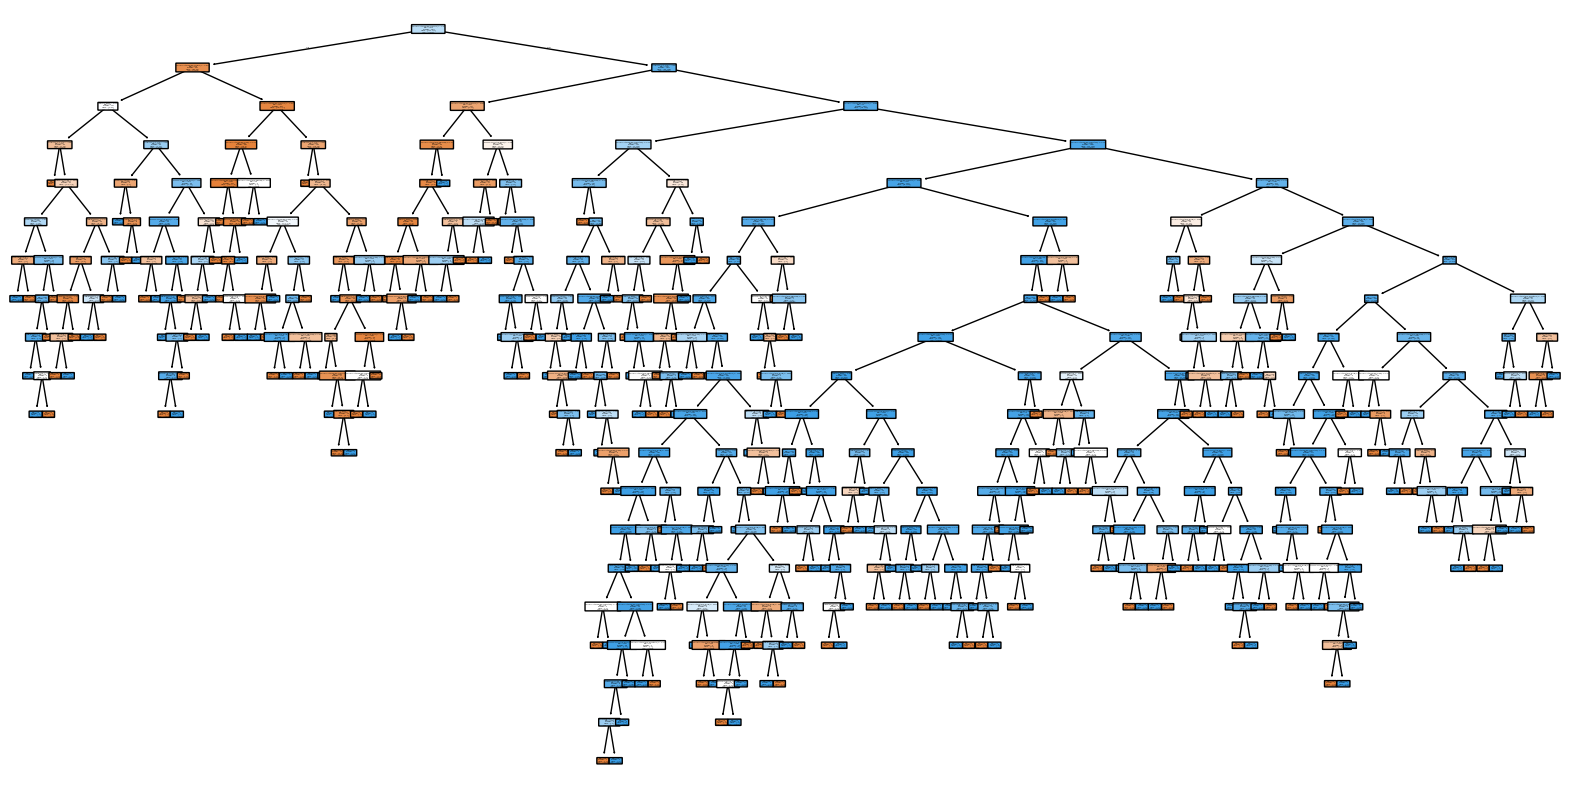

<Figure size 640x480 with 0 Axes>

In [3]:
# Get the unique classes from the target variable
class_names = y.unique().astype(str)

# Create the figure for the tree visualization
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=class_names, 
          rounded=True)

# Show the plot
plt.show()

# Save the tree visualization to a file
plt.savefig('others/decision_tree_plot.png')
